# SC475 - Time Series Analysis  

## 📊 Topic: Time Series Analysis of Daily Bitcoin Closing Prices  

- By **Jash Shah** – 202201016  


#1. Importing Necessary Libraries and Loading Data

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller

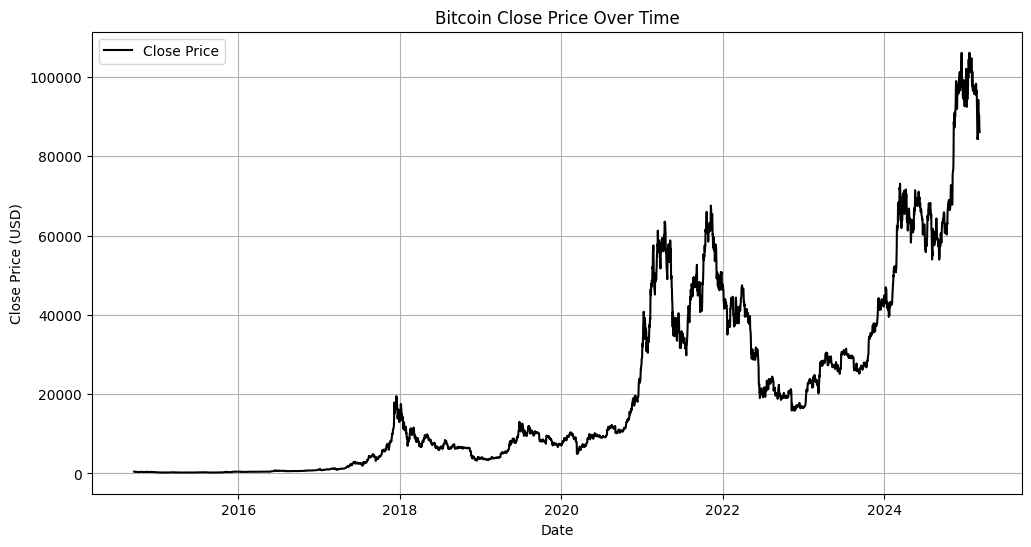

In [36]:
# Define the Bitcoin ticker symbol
btc = yf.Ticker("BTC-USD")

# Fetch historical data from 2014 to 2025
btc_data = btc.history(start="2014-01-01", end="2025-03-09", interval="1d")

# Remove timezone information
btc_data.index = btc_data.index.tz_localize(None)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(btc_data.index, btc_data['Close'], label='Close Price', color='black')

# Formatting
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.title('Bitcoin Close Price Over Time')
plt.legend()
plt.grid(True)
plt.show()

#2. Data Exploration

In [37]:
df = btc_data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3826 entries, 2014-09-17 to 2025-03-08
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3826 non-null   float64
 1   High          3826 non-null   float64
 2   Low           3826 non-null   float64
 3   Close         3826 non-null   float64
 4   Volume        3826 non-null   int64  
 5   Dividends     3826 non-null   float64
 6   Stock Splits  3826 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 239.1 KB


In [38]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0


In [39]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-03-04,86064.070312,88911.273438,81529.242188,87222.195312,68095241474,0.0,0.0
2025-03-05,87222.953125,90998.242188,86379.773438,90623.562500,50498988027,0.0,0.0
2025-03-06,90622.359375,92804.937500,87852.140625,89961.726562,47749810486,0.0,0.0
2025-03-07,89963.281250,91191.046875,84717.679688,86742.671875,65945677657,0.0,0.0
2025-03-08,86742.656250,86847.265625,85247.484375,86154.593750,18206118081,0.0,0.0


In [40]:
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0


In [41]:
df.shape

(3826, 7)

In [42]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3826.000000,3826.000000,3826.000000,3826.000000,3.826000e+03,3826.0,3826.0
mean,20914.024978,21379.036836,20423.261136,20935.235192,1.912904e+10,0.0,0.0
std,24141.109694,24655.220694,23593.533021,24160.311708,2.082104e+10,0.0,0.0
min,176.897003,211.731003,171.509995,178.102997,5.914570e+06,0.0,0.0
25%,1328.477509,1369.512512,1323.482483,1366.317505,5.798373e+08,0.0,0.0
50%,9536.634766,9717.452148,9348.569824,9544.869629,1.523329e+10,0.0,0.0
75%,33843.626953,34737.259766,32367.891602,33840.999023,3.032603e+10,0.0,0.0
max,106147.296875,109114.882812,105291.734375,106146.265625,3.509679e+11,0.0,0.0


Calculating rolling averages


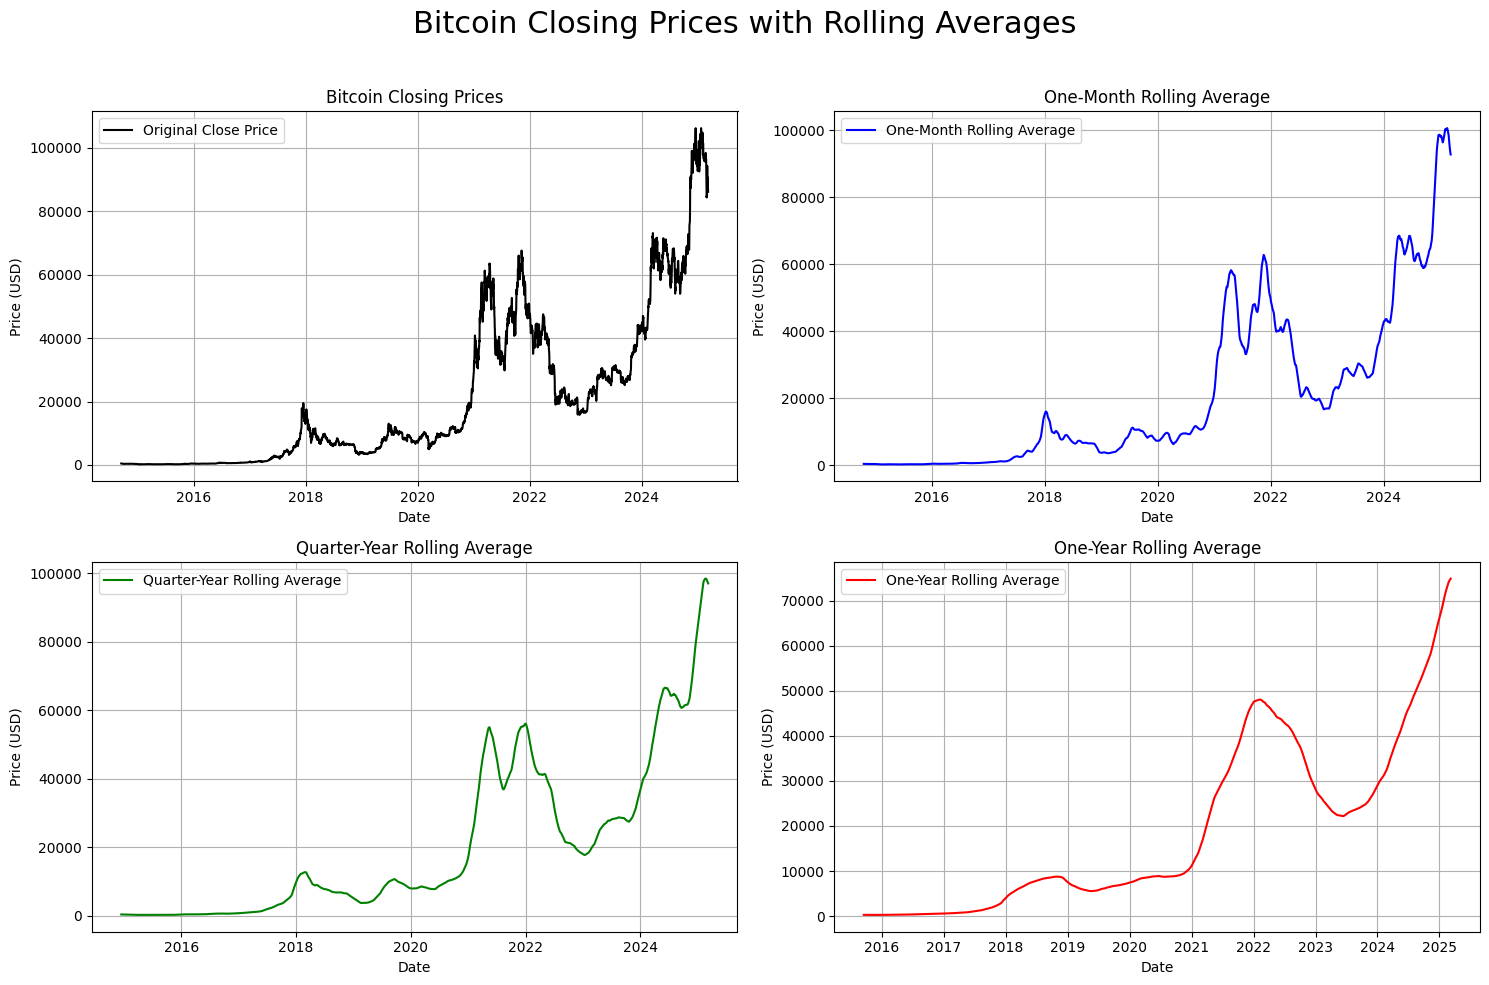

In [43]:
df['rolling_month'] = df['Close'].rolling(window=30).mean()
df['rolling_quarter'] = df['Close'].rolling(window=90).mean()
df['rolling_year'] = df['Close'].rolling(window=365).mean()

# Create a figure with a 2x2 subplot layout
fig = plt.figure(figsize=[15, 10])
plt.suptitle('Bitcoin Closing Prices with Rolling Averages', fontsize=22)

# Subplot 1: Original Close Price
plt.subplot(221)
plt.plot(df.index, df['Close'], label='Original Close Price', color='black')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.title('Bitcoin Closing Prices')

# Subplot 2: One-Month Rolling Average
plt.subplot(222)
plt.plot(df.index, df['rolling_month'], label='One-Month Rolling Average', color='blue')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.title('One-Month Rolling Average')

# Subplot 3: Quarter-Year Rolling Average
plt.subplot(223)
plt.plot(df.index, df['rolling_quarter'], label='Quarter-Year Rolling Average', color='green')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.title('Quarter-Year Rolling Average')

# Subplot 4: One-Year Rolling Average
plt.subplot(224)
plt.plot(df.index, df['rolling_year'], label='One-Year Rolling Average', color='red')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.title('One-Year Rolling Average')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust spacing to fit suptitle
plt.show()

# Resample to Monthly Data

We want to use monthly average (or last-day-of-month close) to reduce noise and produce a more stable series.

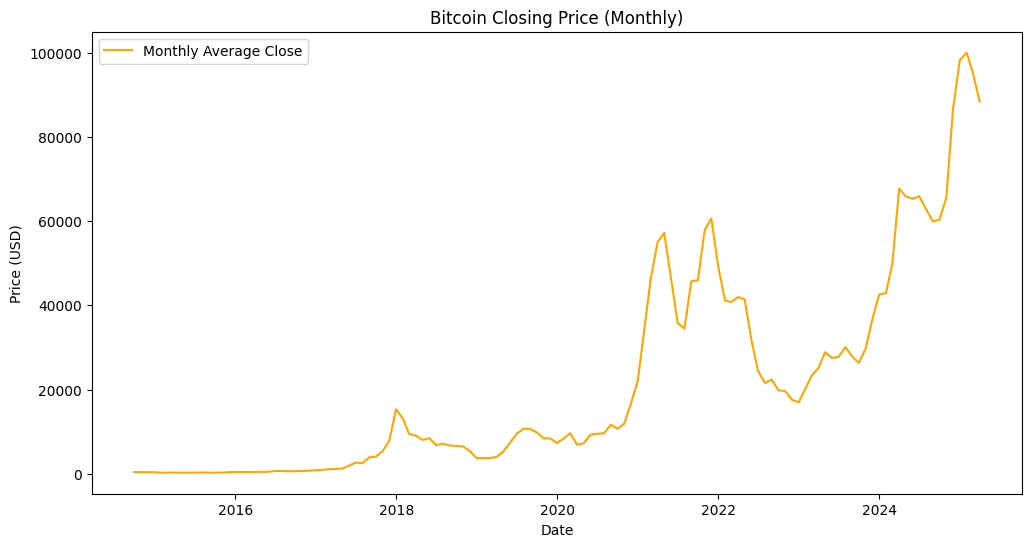

In [44]:
# Resample to monthly and take the mean of the daily close prices
df_monthly = df['Close'].resample('ME').mean()

# Plot the monthly closing prices
plt.figure(figsize=(12,6))
plt.plot(df_monthly, label='Monthly Average Close', color='orange')
plt.title('Bitcoin Closing Price (Monthly)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Stationarity Checks

Time series models such as ARIMA assume stationarity. We’ll use:

1. **Augmented Dickey-Fuller (ADF) test**

If the p-value in ADF is less than significance level (commonly 0.05), we typically say the series is stationary.

2. **Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test**

In the KPSS test, if the p-value is high, the series is more likely stationary (the null hypothesis for KPSS is stationarity).

In [45]:
from statsmodels.tsa.stattools import adfuller, kpss

def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Statistic','p-value','# Lags Used','Number of Observations Used']
    out = dict(zip(labels, result[0:4]))
    for key, val in out.items():
        print(f"   {key}: {val}")
    for key,val in result[4].items():
        print(f"   Critical Value {key}: {val}")
    print("")

def kpss_test(series, **kw):
    print('KPSS Test:')
    statistic, p_value, n_lags, critical_values = kpss(series.dropna(), **kw)
    print(f'   Test Statistic: {statistic}')
    print(f'   p-value: {p_value}')
    print(f'   # Lags: {n_lags}')
    for key, val in critical_values.items():
        print(f'   Critical Value {key}: {val}')
    print("")

# Apply ADF and KPSS
adf_test(df_monthly, title='Monthly Bitcoin Close')
kpss_test(df_monthly, regression='c')


Augmented Dickey-Fuller Test: Monthly Bitcoin Close
   ADF Statistic: -0.09145483739193637
   p-value: 0.9502830413048908
   # Lags Used: 2
   Number of Observations Used: 124
   Critical Value 1%: -3.484219653271961
   Critical Value 5%: -2.885145235641637
   Critical Value 10%: -2.579359138917794

KPSS Test:
   Test Statistic: 1.4322032882527522
   p-value: 0.01
   # Lags: 6
   Critical Value 10%: 0.347
   Critical Value 5%: 0.463
   Critical Value 2.5%: 0.574
   Critical Value 1%: 0.739



If ADF p-value > 0.05, it indicates non-stationarity.

If KPSS p-value < 0.05, it also indicates non-stationarity.


# Transformation

ARIMA often handles data more gracefully when it’s transformed to reduce heteroskedasticity (variance changing over time) and large fluctuations:

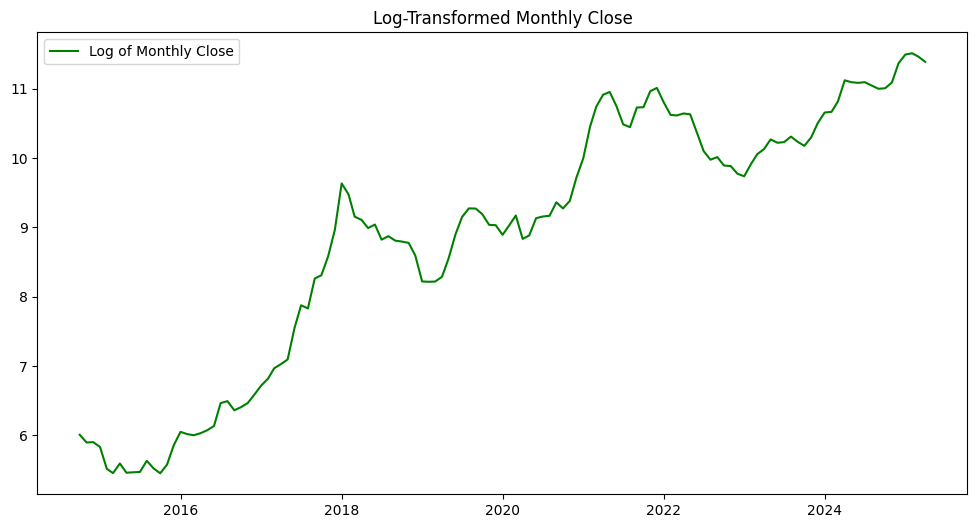

In [46]:
import numpy as np

df_monthly_log = np.log(df_monthly)
plt.figure(figsize=(12,6))
plt.plot(df_monthly_log, label='Log of Monthly Close', color='green')
plt.title('Log-Transformed Monthly Close')
plt.legend()
plt.show()


# First Differencing

After log transformation, we often apply differencing to remove trends and make the series stationary.

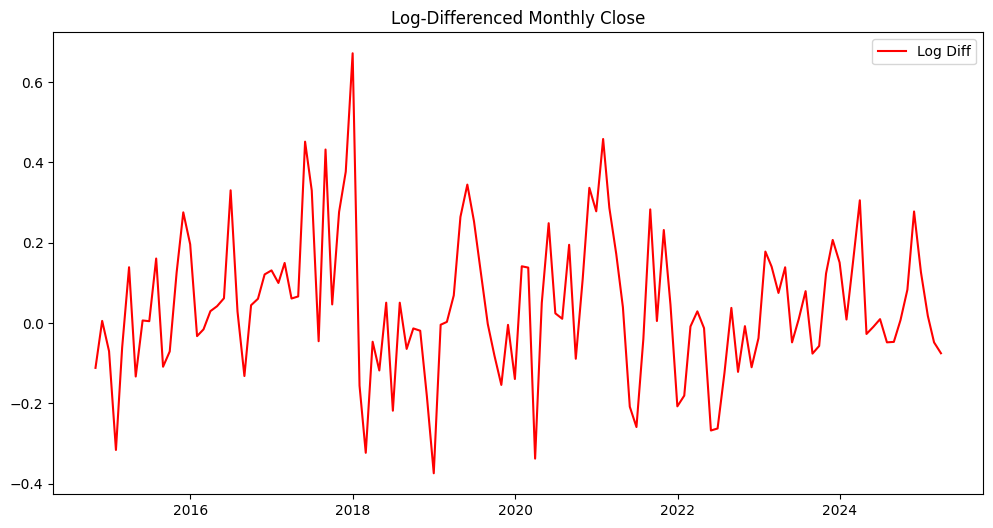

In [47]:
df_monthly_log_diff = df_monthly_log.diff().dropna()

# Plot differenced log
plt.figure(figsize=(12,6))
plt.plot(df_monthly_log_diff, label='Log Diff', color='red')
plt.title('Log-Differenced Monthly Close')
plt.legend()
plt.show()


In [48]:
adf_test(df_monthly_log_diff, title='Log-Diff Monthly Bitcoin Close')
kpss_test(df_monthly_log_diff, regression='c')

Augmented Dickey-Fuller Test: Log-Diff Monthly Bitcoin Close
   ADF Statistic: -7.461944327730408
   p-value: 5.325404916755988e-11
   # Lags Used: 0
   Number of Observations Used: 125
   Critical Value 1%: -3.4837793736959997
   Critical Value 5%: -2.88495387648
   Critical Value 10%: -2.579256976

KPSS Test:
   Test Statistic: 0.07550587821923349
   p-value: 0.1
   # Lags: 3
   Critical Value 10%: 0.347
   Critical Value 5%: 0.463
   Critical Value 2.5%: 0.574
   Critical Value 1%: 0.739



# Plot ACF & PACF

We use the AutoCorrelation Function (ACF) and Partial AutoCorrelation Function (PACF) plots to get initial guesses for (p,d,q) for the ARIMA model

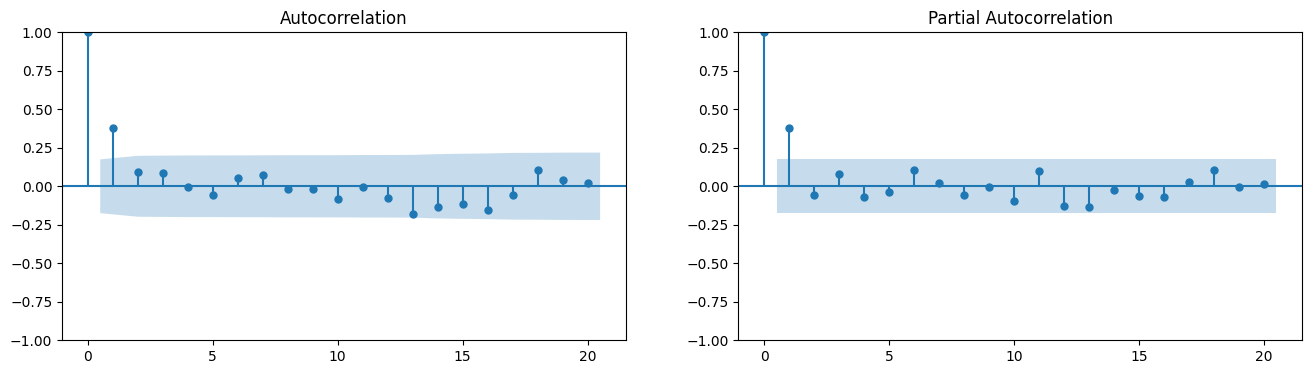

In [49]:
import statsmodels.api as sm

fig, axes = plt.subplots(1, 2, figsize=(16,4))
sm.graphics.tsa.plot_acf(df_monthly_log_diff, lags=20, ax=axes[0])
sm.graphics.tsa.plot_pacf(df_monthly_log_diff, lags=20, ax=axes[1])
plt.show()

# Train-Test Split

Although there are many ways (like rolling forecasts), a simple approach is:

Split the monthly data into a training set (e.g., from 2014 up to, say, end of 2023).

Leave the last portion of data (e.g., 2024 to 2025) as a test set to assess performance.

In [50]:
# Example: split in 2023-01
split_date = '2023-01-01'
train = df_monthly_log[:split_date]
test = df_monthly_log[split_date:]

print(train.shape, test.shape)


(100,) (27,)


# Build the ARIMA Model

In [51]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA

# We'll guess p=1, d=1, q=1 for demonstration.
# Adjust based on your ACF/PACF analysis.
p, d, q = 1, 1, 1

arima_model = ARIMA(train, order=(p, d, q))
arima_result = arima_model.fit()
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  31.022
Date:                Tue, 15 Apr 2025   AIC                            -56.044
Time:                        10:43:47   BIC                            -48.258
Sample:                    09-30-2014   HQIC                           -52.894
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3489      0.196      1.776      0.076      -0.036       0.734
ma.L1          0.0684      0.221      0.310      0.757      -0.364       0.501
sigma2         0.0312      0.004      7.418      0.0

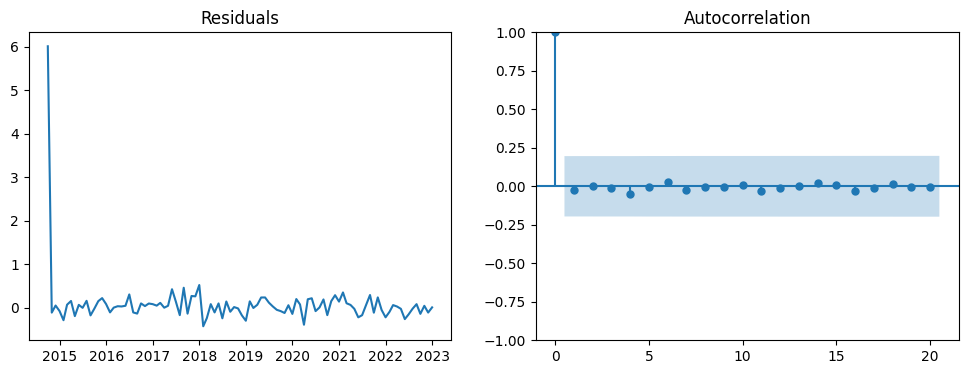

In [52]:
residuals = arima_result.resid
fig, axes = plt.subplots(1,2,figsize=(12,4))
axes[0].plot(residuals)
axes[0].set_title('Residuals')
sm.graphics.tsa.plot_acf(residuals, lags=20, ax=axes[1])
plt.show()


# Forecast

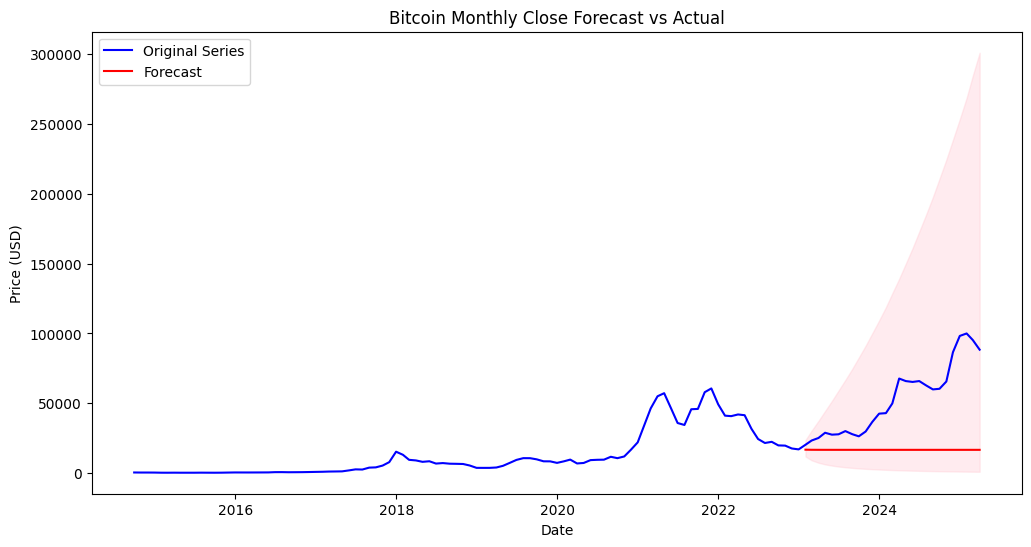

In [53]:
forecast_steps = len(test)
forecast_result = arima_result.get_forecast(steps=forecast_steps)

# Predicted mean in log space
forecast_log = forecast_result.predicted_mean

# Confidence intervals in log space
ci = forecast_result.conf_int()

# Convert log-forecast back to original scale
forecast = np.exp(forecast_log)
ci_exp = np.exp(ci)

# Build a DataFrame to compare
forecast_index = test.index
forecast_df = pd.DataFrame({
    'Forecast': forecast.values,
    'Lower_CI': ci_exp.iloc[:, 0].values,
    'Upper_CI': ci_exp.iloc[:, 1].values
}, index=forecast_index)

# Combine actual (test) & forecast
combined_df = pd.concat([df_monthly.loc[test.index], forecast_df], axis=1)

plt.figure(figsize=(12,6))
plt.plot(df_monthly, label='Original Series', color='blue')
plt.plot(combined_df['Forecast'], label='Forecast', color='red')
plt.fill_between(
    combined_df.index,
    combined_df['Lower_CI'],
    combined_df['Upper_CI'],
    color='pink', alpha=0.3
)
plt.title('Bitcoin Monthly Close Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()
